In [1]:
# Data Manipulation Libraries
import pandas as pd 

# Data Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Machine Learning Libraries 

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Others
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Houseprice.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


# Check Correlation Values

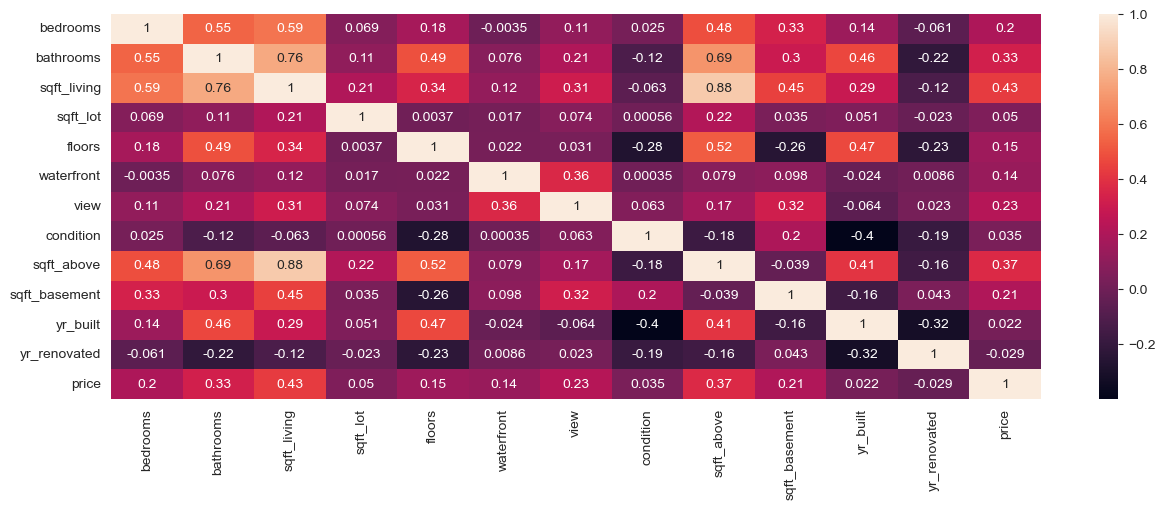

In [4]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [5]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


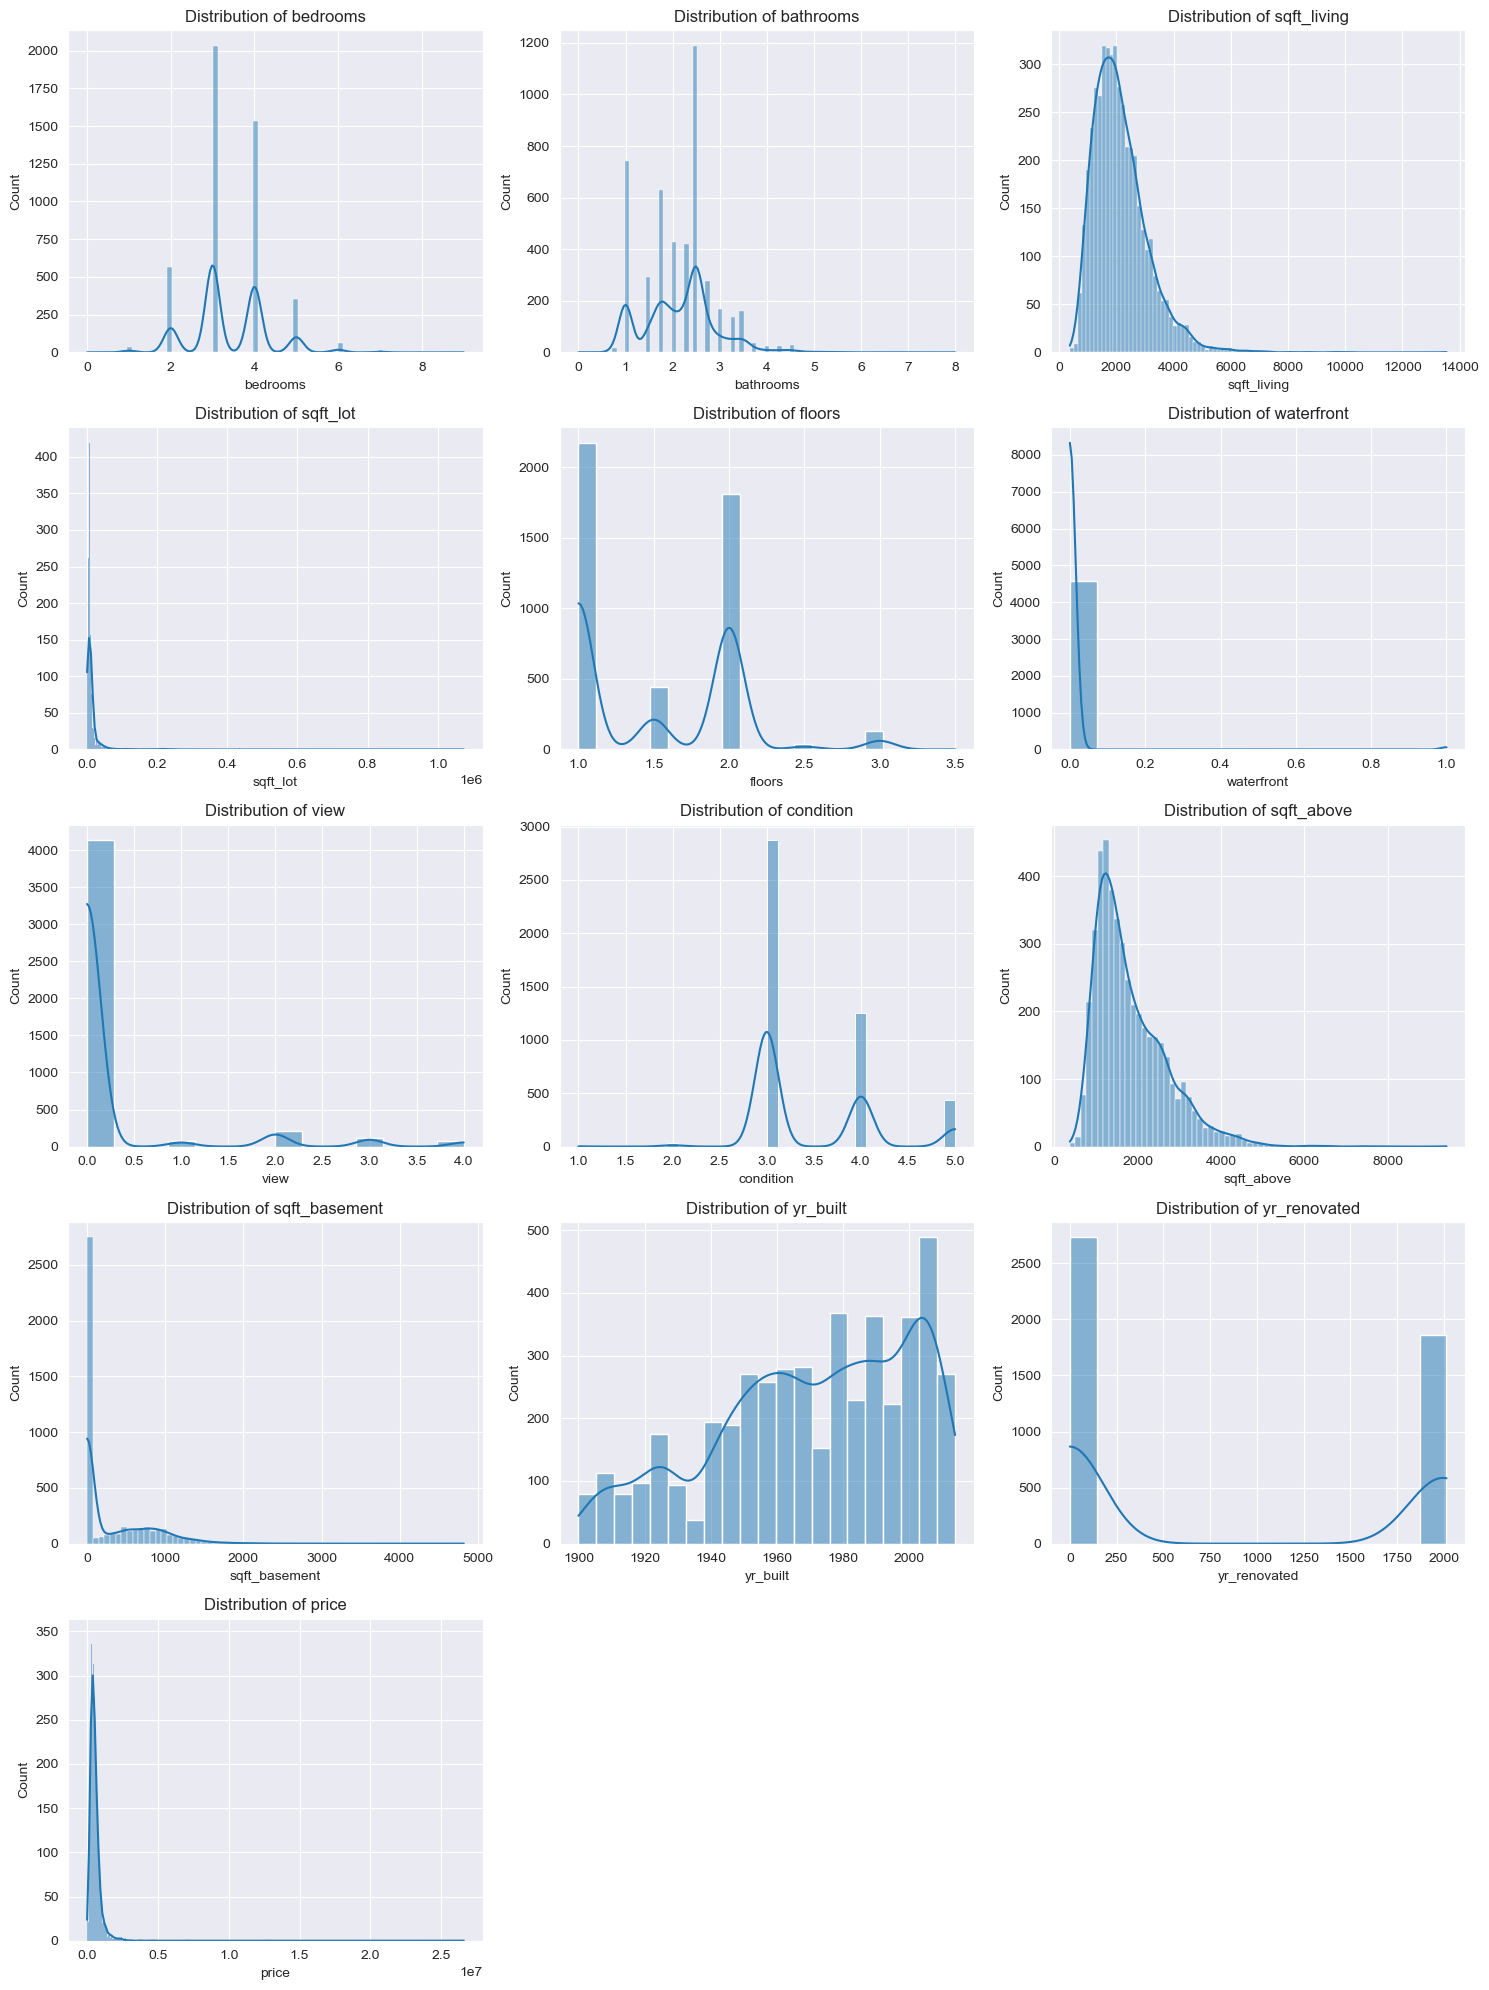

In [6]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Train Test Split

In [8]:
x = df.drop('price', axis=1)
y = df['price']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Successfully completed.")

Successfully completed.


# StandardScaler

In [11]:
ss = StandardScaler()
ss.fit(x_train)

x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

print("Successfully completed.")

Successfully completed.


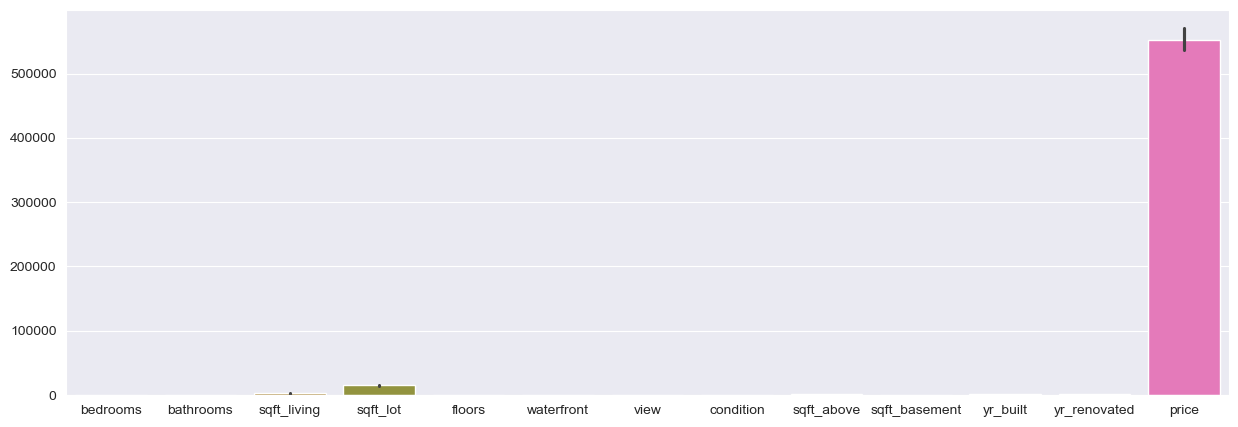

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(df)
plt.show()

# LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [220]:
print(f"Model Accuracy: {lr.score(x_test, y_test) * 100:.3f}%")


Model Accuracy: 3.246%


In [326]:
print(f"MSE: {mean_squared_error(y_test, lr.predict(x_test))}")
print(f"MAE: {mean_absolute_error(y_test, lr.predict(x_test))}")
print(f"R^2: {np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))}")

MSE: 986746667281.8662
MAE: 210782.35945191525
R^2: 993351.2305734897


## Coefficient Barplot_01

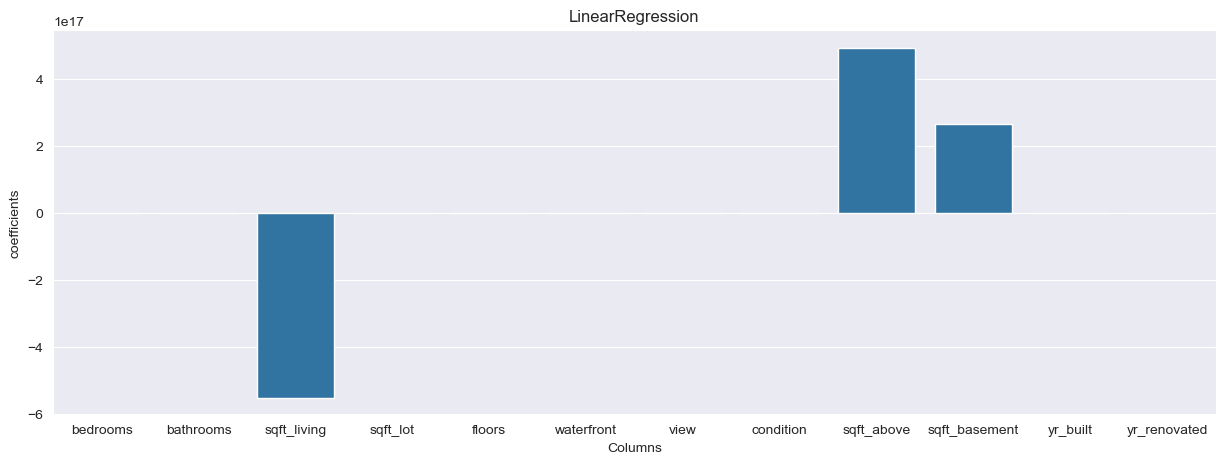

In [73]:
# Coefficient Barplot 
plt.figure(figsize=(15,5))
sns.barplot(x=x.columns, y=lr.coef_)
plt.title("LinearRegression")
plt.xlabel("Columns")
plt.ylabel("coefficients")
plt.show()

# Lasso

#### Too small → behaves like Linear Regression
Too big → all coefficients become 0

Middle values → best performance

In [307]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_grid = [
    0.0001, 0.001, 0.01, 0.1, 0.5, 1,   # Small Range (light regularization)
    5, 10, 20, 50, 80, 100,             # Medium Range (balanced regularization)
    150, 200, 250, 300, 400, 500       # Large Range (strong regularization / feature selection)
]
params = {'alpha':alpha_grid}
gs = GridSearchCV(Lasso(), params, cv=5)
gs.fit(x_train, y_train)

gs.best_params_


{'alpha': 500}

In [269]:
la = Lasso(alpha=200)
la.fit(x_train, y_train)

Lasso(alpha=80)

In [271]:
print(f"Model Accuracy: {la.score(x_test, y_test) * 100:.3f}%")


Model Accuracy: 3.231%


In [328]:
print(f"MSE: {mean_squared_error(y_test, la.predict(x_test))}")
print(f"MAE: {mean_absolute_error(y_test, la.predict(x_test))}")
print(f"R^2: {np.sqrt(mean_squared_error(y_test, la.predict(x_test)))}")

MSE: 986898977038.2041
MAE: 210879.24155154233
R^2: 993427.8922187579


## Coefficient Barplot_02

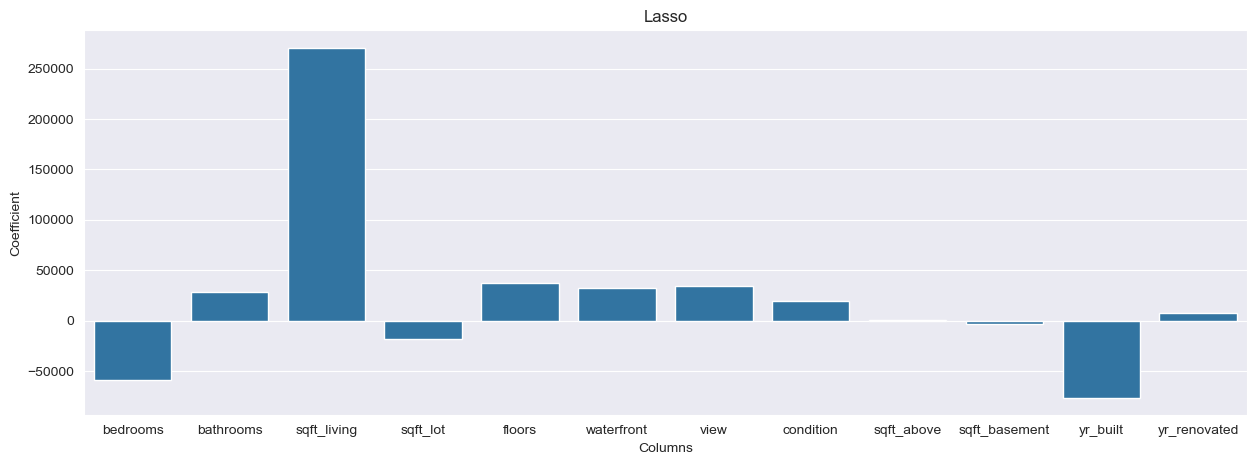

In [128]:
plt.figure(figsize=(15,5))
sns.barplot(x=x.columns, y=la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.show()

# Ridge

#### Too small α → behaves like Linear Regression
Too large α → coefficients shrink a lot but never become 0

Middle α values → best performance

In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = [
    0.0001, 0.001, 0.01, 0.1,    # Small alpha (weak regularization)
    1, 5, 10, 20, 50, 80, 100,   # Medium alpha (commonly best range)
    200, 300, 500, 800, 1000     # Large alpha (strong regularization)
]

params = {'alpha':alpha_grid}
gs = GridSearchCV(Ridge(), params, cv=5)
gs.fit(x_train, y_train)

gs.best_params_


{'alpha': 100}

In [299]:
rg = Ridge(alpha=100)
rg.fit(x_train,y_train)

Ridge(alpha=100)

In [301]:
print(f"Model Accurecy: {rg.score(x_test, y_test)*100:.3f}%")

Model Accurecy: 3.335%


In [330]:
print(f"MSE: {mean_squared_error(y_test, rg.predict(x_test))}")
print(f"MAE: {mean_absolute_error(y_test, rg.predict(x_test))}")
print(f"R^2: {np.sqrt(mean_squared_error(y_test, rg.predict(x_test)))}")

MSE: 985829983328.1517
MAE: 210112.056596218
R^2: 992889.7135775713


## Coefficient Barplot_03

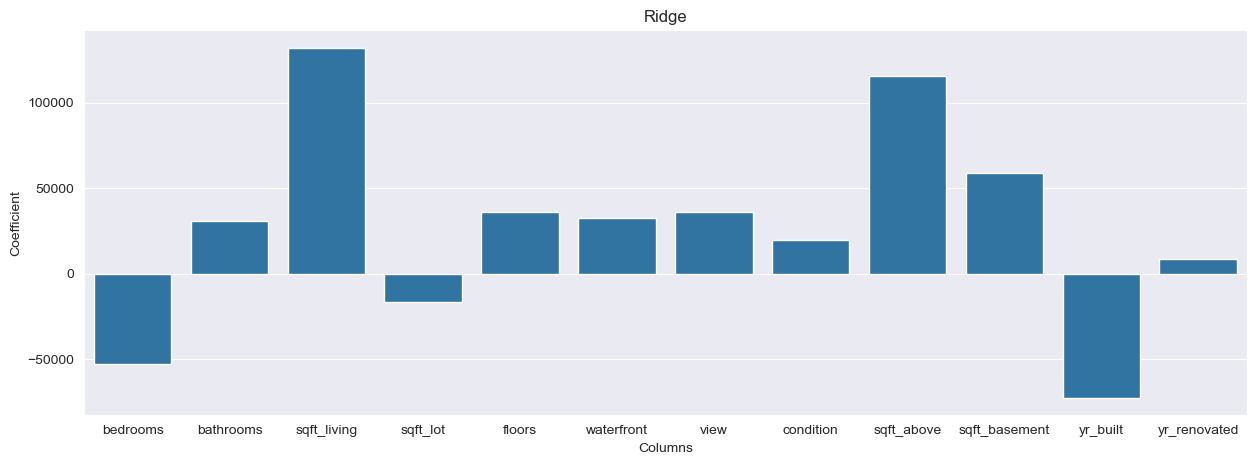

In [303]:
plt.figure(figsize=(15,5))
sns.barplot(x=x.columns, y=rg.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coefficient")
plt.show()

In [314]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np 

In [318]:
print(f"MSE: {mean_squared_error(y_test, lr.predict(x_test))}")
print(f"MAE: {mean_absolute_error(y_test, lr.predict(x_test))}")
print(f"MSE: {np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))}")

MSE: 986746667281.8662
MAE: 210782.35945191525
MSE: 993351.2305734897


# Coefficient values compare

In [336]:
df2 = pd.DataFrame({"Col_Name":x.columns,
                   "LinearRegression":lr.coef_,
                   "Lasso":la.coef_,
                   "Ridge":rg.coef_})

df2

,Col_Name,LinearRegression,Lasso,Ridge
0,bedrooms,-5.848445e+04,-58369.526786,-52889.063753
1,bathrooms,2.856813e+04,28452.211389,30866.285089
2,sqft_living,-5.514176e+17,263808.726797,132169.815458
3,sqft_lot,-1.843589e+04,-18188.539922,-16819.388724
4,floors,3.737547e+04,37528.227585,36328.438207
5,waterfront,3.263446e+04,32594.774730,32468.256430
6,view,3.459581e+04,34586.643740,35816.234503
7,condition,1.982879e+04,19682.462663,19841.578977
8,sqft_above,4.940989e+17,6479.328289,115590.178472
9,sqft_basement,2.672178e+17,0.000000,59007.224303
